In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [11]:
df_11 = pd.read_pickle('D:/Data Sience/Project/Dt_02/diabetes/2011.pkl')
df_12 = pd.read_pickle('D:/Data Sience/Project/Dt_02/diabetes/2012.pkl')
df_13 = pd.read_pickle('D:/Data Sience/Project/Dt_02/diabetes/2013.pkl')
df_14 = pd.read_pickle('D:/Data Sience/Project/Dt_02/diabetes/2014.pkl')
df_15 = pd.read_pickle('D:/Data Sience/Project/Dt_02/diabetes/2015.pkl')

# Combine datasets:
df = pd.concat([df_11, df_12, df_13, df_14, df_15], ignore_index=True)

In [12]:
df = pd.DataFrame({
    'Diabetes': df['DIABETE3'],
    'BMI': df['_BMI5'],
    'physical_act': df['_TOTINDA'],
    'Stroke': df['CVDSTRK3']
})
df = df.dropna()
df.head()

,Diabetes,BMI,physical_act,Stroke
0,3.0,1855.0,2.0,2.0
1,3.0,3529.0,2.0,2.0
2,3.0,1695.0,1.0,2.0
3,3.0,2579.0,9.0,2.0
4,4.0,4346.0,1.0,2.0


In [13]:
x = df[['BMI', 'physical_act', 'Stroke']]
y = df['Diabetes']

In [14]:
x_train , x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [15]:
clf = RandomForestClassifier(n_estimators= 100, random_state= 42)

In [16]:
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = clf.predict(x_test)

In [18]:
print(confusion_matrix, y_pred)
print(classification_report(y_test, y_pred))

<function confusion_matrix at 0x00000129C767C860> [3. 3. 3. ... 3. 3. 3.]
              precision    recall  f1-score   support

         1.0       0.44      0.04      0.07     56728
         2.0       0.00      0.00      0.00      3784
         3.0       0.85      0.99      0.92    377787
         4.0       0.02      0.00      0.00      7503
         7.0       0.00      0.00      0.00       481
         9.0       0.65      0.23      0.34       132

    accuracy                           0.85    446415
   macro avg       0.33      0.21      0.22    446415
weighted avg       0.78      0.85      0.78    446415



Feature Importances:
         Feature  Importance
0           BMI    0.805328
2        Stroke    0.106836
1  physical_act    0.087836


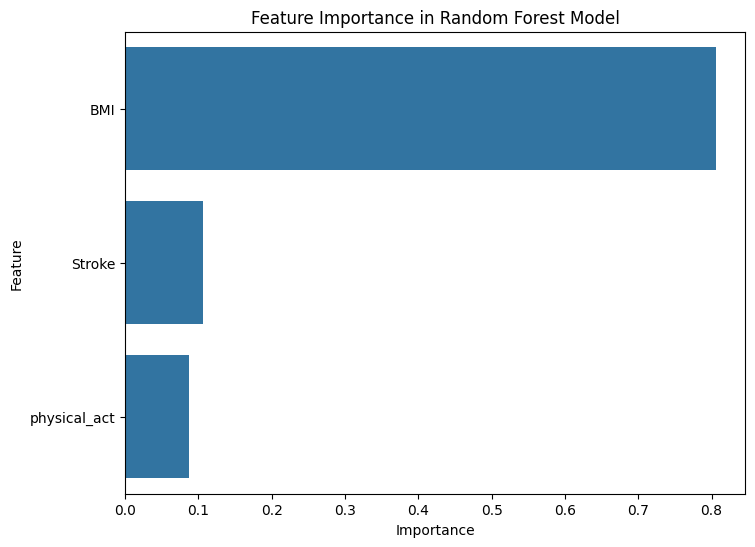

In [19]:
importances = clf.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

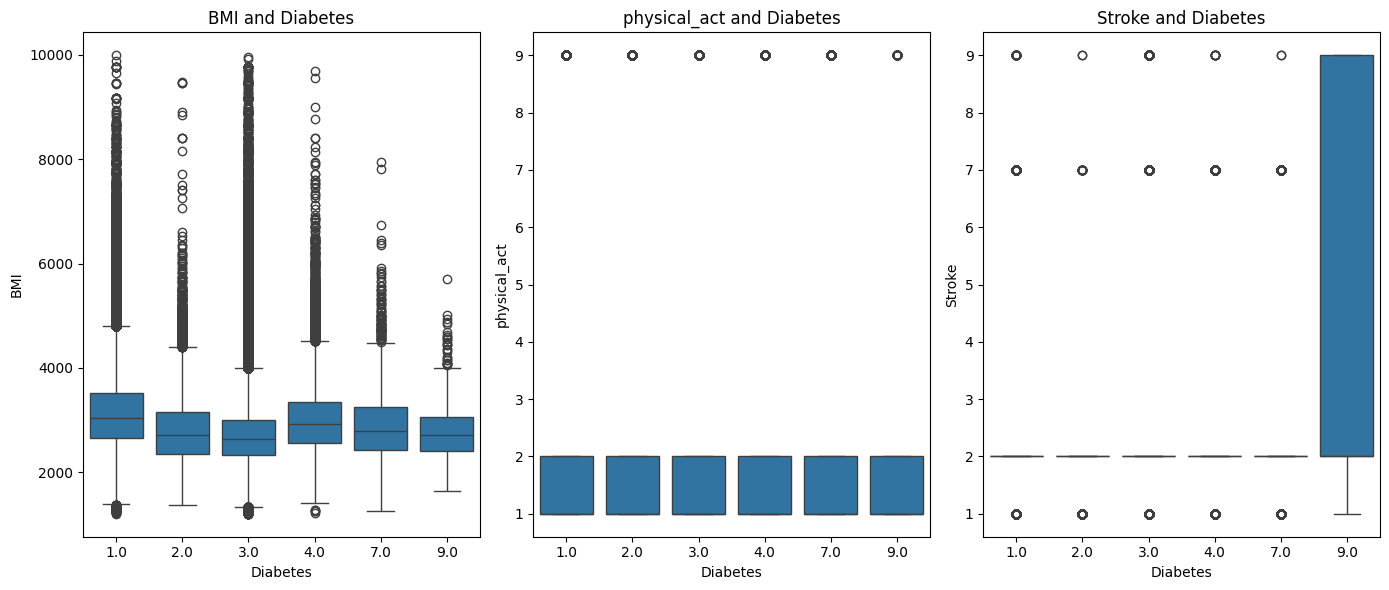

In [21]:
plt.figure(figsize=(14, 6))

#BMI and Diabetes
plt.subplot(1, 3, 1)
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI and Diabetes')

#physical_act and Diabetes
plt.subplot(1, 3, 2)
sns.boxplot(x='Diabetes', y='physical_act', data=df)
plt.title('physical_act and Diabetes')

#Stroke and Diabetes
plt.subplot(1, 3, 3)
sns.boxplot(x='Diabetes', y='Stroke', data=df)
plt.title('Stroke and Diabetes')

plt.tight_layout()
plt.show()